In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle

In [3]:
with open('C:/Users/hp/OneDrive/Documents/AML Capstone Project/Player-Performance-Improvement-Prediction/Data Gathering/Datasets/df_2018_to_2021_with_next_game_draftkings_score.pkl','rb') as f:
    df = pickle.load(f)

In [4]:
df = pd.DataFrame(df)

In [5]:
df.head()

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score,Draftkings next game score,Next Opponent
0,22018,101108,Chris Paul,0021800009,2018-10-17,HOU vs. NOP,HOU,NOP,1,0,...,0,1,3,19,33.838,0,0,62.25,68.25,LAL
1,22018,101108,Chris Paul,0021800035,2018-10-20,HOU @ LAL,HOU,LAL,0,1,...,0,3,2,28,49.812,1,0,68.25,65.00,LAC
2,22018,101108,Chris Paul,0021800070,2018-10-26,HOU vs. LAC,HOU,LAC,1,0,...,0,5,3,12,21.051,0,0,65.00,77.25,POR
3,22018,101108,Chris Paul,0021800101,2018-10-30,HOU vs. POR,HOU,POR,1,0,...,0,2,4,17,28.153,0,0,77.25,113.75,BKN
4,22018,101108,Chris Paul,0021800118,2018-11-02,HOU @ BKN,HOU,BKN,0,1,...,2,2,4,32,53.783,1,0,113.75,108.50,CHI


In [6]:
df['Game Date'] = pd.to_datetime(df['Game Date'])

In [7]:
df.drop(["Player Name",
         "Season ID",
         "Player ID",
         "Game ID",
         "Matchup",
         "Game Date",
         "Player Team",
         "Opponent", 
         "Home",
         "Won",
         "Player Efficiency Ratings",
         "DraftKings score",
         "Next Opponent"], axis=1, inplace=True)

df.head(2)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Double-double,Triple-double,Draftkings next game score
0,32,6,12,3,7,4,5,0,5,6,2,0,1,3,19,0,0,68.25
1,30,9,17,3,6,7,9,2,5,10,1,0,3,2,28,1,0,65.00


In [9]:
q1,q3 = df['Draftkings next game score'].quantile(.25) , df['Draftkings next game score'].quantile(.75)

In [19]:
q3

35.0

In [13]:
IQR = q3-q1

In [14]:
IQR

24.0

In [15]:
df.shape

(57689, 18)

In [17]:
df_final = df.loc[(df['Draftkings next game score'] < q3+1.5*IQR)]

In [18]:
df_final

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Double-double,Triple-double,Draftkings next game score
0,32,6,12,3,7,4,5,0,5,6,2,0,1,3,19,0,0,68.25
1,30,9,17,3,6,7,9,2,5,10,1,0,3,2,28,1,0,65.00
5,35,3,11,0,3,1,3,0,6,8,4,0,4,1,7,0,0,51.75
7,36,4,11,0,4,2,2,0,2,5,6,0,5,3,10,0,0,56.50
9,35,8,13,5,8,5,7,0,5,5,3,0,2,3,26,0,0,51.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57684,26,7,11,4,7,0,0,1,3,1,1,0,2,4,18,0,0,19.50
57685,31,1,9,1,4,3,3,2,6,1,1,0,0,1,6,0,0,36.00
57686,36,8,13,2,7,1,1,0,4,1,3,1,0,2,19,0,0,24.75
57687,30,1,6,0,2,2,2,1,6,2,2,0,0,2,4,0,0,30.75


In [20]:
df_final.shape

(55016, 18)

In [21]:
# Using the current game stats to predict the next game DraftKing score
X = df_final.iloc[:-1, 0:-1].values
y = df_final.iloc[1:, -1].values

In [22]:
df.shape

(57689, 18)

In [23]:
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

X.shape: (55015, 17)
y.shape: (55015,)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [25]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (44012, 17)
X_test.shape: (11003, 17)
y_train.shape: (44012,)
y_test.shape: (11003,)


In [26]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [27]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (44012, 17)
X_test.shape: (11003, 17)
y_train.shape: (44012,)
y_test.shape: (11003,)


In [28]:
#X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(f'X_train.shape: {X_train.shape}')

X_train.shape: (44012, 17, 1)


In [29]:
len(X_train[0])

17

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

#Adding the first LSTM layer and dropout regularisation
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding a second LSTM layer and dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a thrid LSTM layer and dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a fourth LSTM layer and dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

#adding the output layer
regressor.add(Dense(units = 1))

#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = regressor.fit(X_train, y_train, epochs = 10, batch_size = 10, verbose=1)

Epoch 1/10
4402/4402 [==============================] - 157s 34ms/step - loss: 245.7988
Epoch 2/10
4402/4402 [==============================] - 150s 34ms/step - loss: 193.6845
Epoch 3/10
4402/4402 [==============================] - 148s 34ms/step - loss: 190.5151
Epoch 4/10
4402/4402 [==============================] - 149s 34ms/step - loss: 189.5732
Epoch 5/10
4402/4402 [==============================] - 151s 34ms/step - loss: 189.4911
Epoch 6/10
4402/4402 [==============================] - 151s 34ms/step - loss: 187.7114
Epoch 7/10
4402/4402 [==============================] - 150s 34ms/step - loss: 187.0197
Epoch 8/10
4402/4402 [==============================] - 149s 34ms/step - loss: 186.9226
Epoch 9/10
4402/4402 [==============================] - 148s 34ms/step - loss: 186.1808
Epoch 10/10
4402/4402 [==============================] - 146s 33ms/step - loss: 185.5134


In [31]:
y_pred = regressor.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

178.36938684130658

In [33]:
y_pred.shape

(11003, 1)

In [34]:
y_test.shape

(11003,)

In [35]:
y_pred.reshape(-1).shape

(11003,)

In [36]:
np.concatenate((y_test, y_pred.reshape(-1)), axis=0).shape

(22006,)

In [37]:
scatter_df = pd.DataFrame(np.concatenate((y_test, y_pred.reshape(-1)), axis=0), columns=['Value'])

real_predicted = ['Real Value'] * int(scatter_df.shape[0]/2) + ['Predicted Value'] * int(scatter_df.shape[0]/2)
scatter_df['Real/Predicted'] = real_predicted
scatter_df['Sample'] = list(range(int(scatter_df.shape[0]/2))) * 2
scatter_df.head(2)

,Value,Real/Predicted,Sample
0,7.5,Real Value,0
1,29.0,Real Value,1


<AxesSubplot:xlabel='Sample', ylabel='Value'>

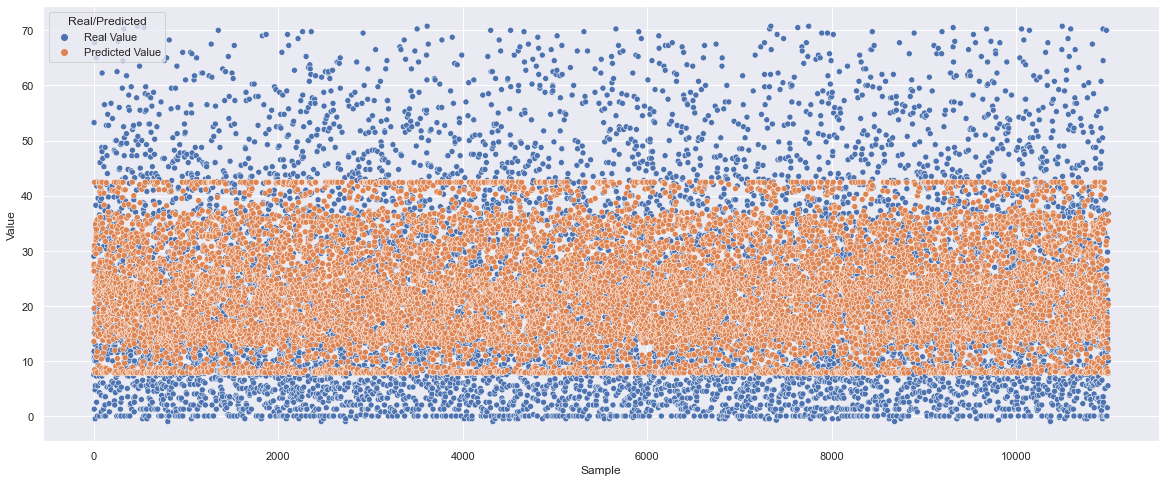

In [38]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20, 8)})
sns.scatterplot(data=scatter_df, x='Sample', y='Value', hue='Real/Predicted')

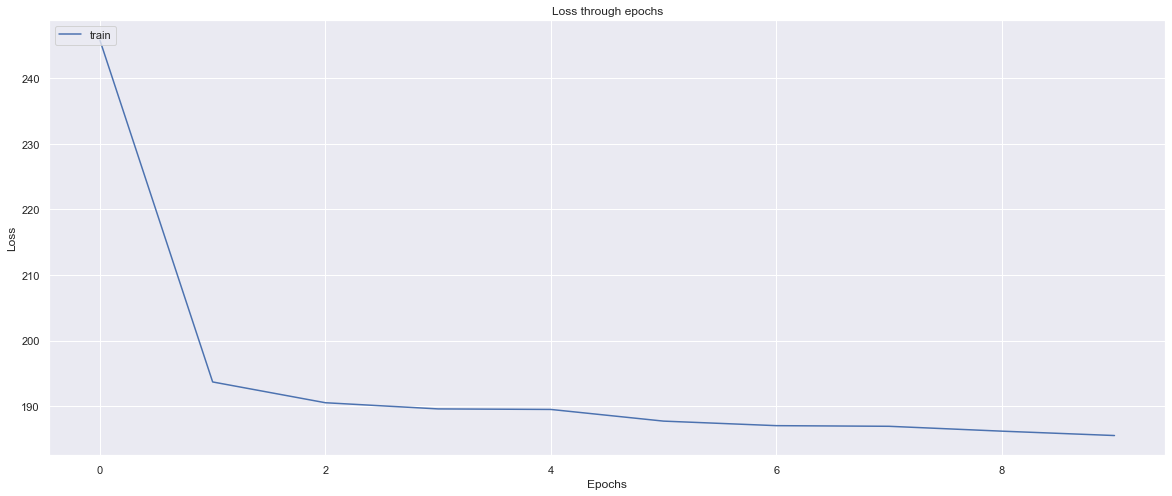

In [39]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.title('Loss through epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()